<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_11286_conformity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

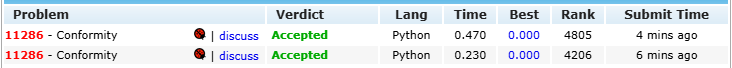

**@PDF: [UVA 11286 - Conformity](https://onlinejudge.org/external/112/11286.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 11286 Conformity

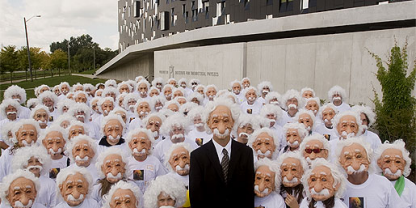

Frosh commencing their studies at Waterloo have diverse interests, as evidenced by their desire to take various combinations of courses from among those available.

University administrators are uncomfortable with this situation, and therefore wish to offer a conformity prize to frosh who choose the most popular combination of courses. How many frosh will win the prize?

## Input

The input consists of several test cases followed by a line containing '0'. Each test case begins with an integer $1 \le n \le 10000$, the number of frosh. For each frosh, a line follows containing the course numbers of five distinct courses selected by the frosh. Each course number is an integer between 100 and 499.

The popularity of a combination is the number of frosh selecting exactly the same combination of courses. A combination of courses is considered most popular if no other combination has higher popularity.

## Output

For each line of input, you should output a single line giving the total number of students taking some combination of courses that is most popular.

## Sample Input

3\
100 101 102 103 488\
100 200 300 101 102\
103 102 101 488 100\
3\
200 202 204 206 208\
123 234 345 456 321\
100 200 300 400 444\
0


## Sample Output

2\
3

In [ ]:
# Import necessary tools:
from collections import Counter # A dictionary subclass for counting hashable objects
from sys import stdin, stdout  # For potentially faster input/output operations
from time import time          # To measure execution time (optional)

# Helper function to find the index and value of the last non-zero element in a list
def last_nonzero(lst):
  """
  Finds the index and value of the rightmost non-zero element in a list.

  Args:
    lst: The list to search within.

  Returns:
    A tuple (index, value) if a non-zero element is found.
    Returns (-1, None) if all elements are zero or the list is empty.
  """
  # Iterate through the list in reverse order, keeping track of the original index 'i'
  # 'enumerate(reversed(lst))' yields (index_from_end, value) pairs.
  for i, value in enumerate(reversed(lst)):
    # Check if the current value is not zero
    if value != 0:
      # Calculate the original index from the left: total_length - index_from_end - 1
      original_index = len(lst) - i - 1
      return original_index, value # Return the original index and the value
  # If the loop finishes without finding a non-zero value
  return -1, None

# Record the start time (optional, for performance analysis)
# start = time()

# Main loop to process multiple test cases from standard input
while True:
  try:
    # Read the number of students (n) for the current test case.
    # .strip() removes potential leading/trailing whitespace/newlines.
    n_str = stdin.readline().strip()
    # Handle potential empty line reads at the end of input
    if not n_str:
        break
    n = int(n_str)

    # Termination condition: If n is 0, stop processing.
    if n == 0:
      break

    # --- Data Structures Initialization for the test case ---
    # 'freq': A list to store the frequency of frequencies.
    # freq[k] will store how many different course combinations
    # have been taken by exactly 'k' students.
    # Size n+1 because the maximum frequency for any combination is n.
    freq = [0] * (n + 1)

    # 'courses': A Counter (dictionary subclass) to store the frequency
    # of each unique combination of courses.
    # Keys will be tuples representing sorted course combinations.
    # Values will be the number of students who took that combination.
    courses = Counter()

    # --- Process each student's course selection ---
    for i in range(n):
      # Read the line containing the courses for one student.
      # Split into parts, convert each part to an integer.
      line_parts = map(int, stdin.readline().strip().split())
      # Sort the courses numerically. This ensures that the order
      # in which courses are listed doesn't matter (e.g., [1, 5, 2] is the same as [5, 1, 2]).
      sorted_courses = sorted(list(line_parts))
      # Convert the sorted list of courses into a tuple.
      # Tuples are hashable, so they can be used as keys in the Counter.
      hash_key = tuple(sorted_courses)

      # --- Update Frequencies ---
      # Get the *previous* frequency of this course combination (before incrementing).
      prev_course_freq = courses[hash_key] # If key doesn't exist, Counter returns 0

      # Increment the count for this specific course combination in the 'courses' Counter.
      courses[hash_key] += 1

      # Get the *new* frequency of this course combination.
      new_course_freq = courses[hash_key] # This is prev_course_freq + 1

      # Update the frequency-of-frequencies ('freq') array:
      # Increment the count for the new frequency level.
      freq[new_course_freq] += 1
      # Decrement the count for the previous frequency level (if it was > 0).
      if prev_course_freq > 0:
          freq[prev_course_freq] -= 1

    # --- Calculate and Print Result ---
    # Find the highest frequency (k_max) achieved by any course combination
    # and how many combinations (count_at_k_max) achieved that frequency.
    # 'last_nonzero(freq)' returns (k_max, count_at_k_max).
    # k_max is the index of the last non-zero element in 'freq'.
    # count_at_k_max is the value at that index.
    k_max, count_at_k_max = last_nonzero(freq)

    # The final result is the total number of students enrolled in any of
    # the most popular course combinations. This is calculated as:
    # (most popular frequency) * (number of combinations with that frequency)
    # If k_max is -1 (no students/courses), the result should be 0.
    result = 0
    if k_max != -1:
        result = k_max * count_at_k_max

    # Write the result to standard output, followed by a newline.
    stdout.write("{}\n".format(result))

  # Handle End-Of-File error if input stream ends unexpectedly.
  except EOFError:
    break
  # Handle errors if input cannot be converted to int where expected
  except ValueError:
      # If input() for 'n' or courses returns something non-integer
      # print("Invalid integer input encountered, stopping.") # Optional debug msg
      break

# Record the end time (optional)
# end = time()
# Calculate and print the elapsed time (commented out as requested)
# print(end - start)